# PREDICTING CUISINE TYPE THROUGH INGREDIENTS

### Project Description: Goals/Motivation/Importance
This project explores recipe data and through of use machine learning techniques aims to understand various patterns, 
food ingredients and their prevalence in different cuisines around the world. 

### Proposed Methodology and Techniques
In information retrieval, tf–idf , short for term frequency–inverse document frequency, is a numerical measure that 
reflects how important a word is to a document in a collection of documents. Certain words that occur too frequently 
have little power in determining the relevance since they are not considered as unique identifiers. 
Also the terms that occur less in the document can be more relevant.

Since the main scope of this project is to predict cuisine type based on given ingredients, 
supervised leaning algorithms are used; logistic regression and linear support vector classification (linearSVC). 
In addition the clustering method k-means is explored to reveal how a clustering algorithm will differentiate 
different ingredients and gain insight into hidden relationships between ingredients or recipes. 

For visualizing high-dimensional datasets the TruncatedSVD and t-SNE techniques are applied. 

Through the entire project I worked in parallel on two different models: ‘bag of ingredients’ and ‘bag of words’ 
trying to explore how their predictions would differ.

### Data
The analysis utilizes a What’s Cooking data set that is available on the kaggle.com 
https://www.kaggle.com/c/whats-cooking/data.
The training data set contains approximately 40k records/recipes while the test data set has approximately 1k records.   
Since the test data set does not contain a column for cuisine type, the train data set is additionally divided into 
the train and the test sets for classification purpose.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import re
from functools import reduce
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
cook = pd.read_json('train.json')

In [3]:
cook=cook.copy()
cook.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [4]:
len(cook)

39774

In [5]:
# TRAIN and TEST set

cook_train = cook[:30000]
cook_test = cook[30000:]

### DATA EXPLORATION

In [6]:
cook_train['cuisine'].value_counts()

italian         5952
mexican         4863
southern_us     3285
indian          2260
chinese         1990
french          1969
thai            1159
cajun_creole    1147
japanese        1084
greek            872
spanish          753
korean           626
vietnamese       625
moroccan         614
british          600
filipino         572
irish            496
jamaican         404
russian          384
brazilian        345
Name: cuisine, dtype: int64

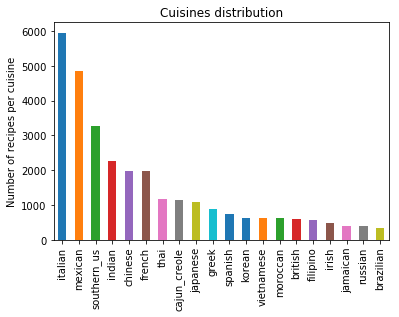

In [7]:
cook_train['cuisine'].value_counts().plot(kind='bar')
plt.ylabel('Number of recipes per cuisine')
plt.title('Cuisines distribution')

In [8]:
cook_train.isnull().sum()

cuisine        0
id             0
ingredients    0
dtype: int64

In [9]:
cook_train['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish',
       'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese',
       'cajun_creole', 'brazilian', 'french', 'japanese', 'irish',
       'korean', 'moroccan', 'russian'], dtype=object)

In [10]:
# I want to count the most common ingredients per each cuisine
# variable "p" means : the most frequent (top) "p" ingredients

def count_most_common_all_cuisines(p):
    count = Counter()
    for cuisine in cook_train['cuisine'].unique():
        for ingredients in cook_train.loc[cook_train['cuisine'] == cuisine, 'ingredients']:
            count.update(ingredients)
    return count.most_common(p)
    return count

In [11]:
# top p = 20 ingredients with the highest frequency

all_count_20_top = count_most_common_all_cuisines(20) #type list

In [12]:
all_count_20_top[0:4]

[('salt', 13648), ('onions', 6015), ('olive oil', 5985), ('water', 5607)]

In [13]:
x, y = zip(*all_count_20_top)

In [14]:
x_pos = np.arange(len(x))

In [15]:
x_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

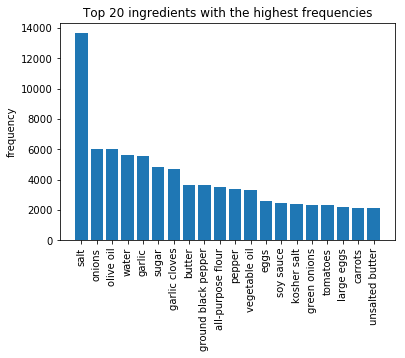

In [16]:
x, y = zip(*all_count_20_top) 
x_pos = np.arange(len(x))  
plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x, rotation = 90)
plt.ylabel('frequency')
plt.title('Top 20 ingredients with the highest frequencies')
 
plt.show()

#### DATA STATISTICS ( MEAN, MEDIAN, STANDARD DEVIATION, PERCENTILE)

In [17]:
# I want to count all ingredients per each cuisine

def count_total_all_cuisines():
    count = Counter()
    for cuisine in cook_train['cuisine'].unique():
        for ingredients in cook_train.loc[cook_train['cuisine'] == cuisine, 'ingredients']:
            count.update(ingredients)
    return count

In [18]:
all_count = count_total_all_cuisines()

In [19]:
all_count

Counter({'romaine lettuce': 191,
         'black olives': 182,
         'grape tomatoes': 175,
         'garlic': 5553,
         'pepper': 3390,
         'purple onion': 1406,
         'seasoning': 105,
         'garbanzo beans': 114,
         'feta cheese crumbles': 257,
         'ground pork': 355,
         'finely chopped fresh parsley': 66,
         'onions': 6015,
         'salt': 13648,
         'vinegar': 246,
         'caul fat': 1,
         'minced garlic': 1181,
         'dried oregano': 1264,
         'red wine vinegar': 565,
         'olive oil': 5985,
         'boneless chop pork': 31,
         'lemon juice': 1059,
         'orange': 271,
         'anise': 42,
         'cinnamon sticks': 478,
         'unflavored gelatin': 90,
         'zinfandel': 8,
         'orange blossom honey': 7,
         'sugar': 4825,
         'lemon': 926,
         'calimyrna figs': 11,
         'clove': 453,
         'honey': 989,
         'whipping cream': 478,
         'plain whole-milk yogurt

In [20]:
type(all_count.values())

dict_values

In [21]:
# Number of unique ingredients

len(all_count)

6205

In [22]:
all_count_array = list(all_count.values())

In [23]:
# MEAN, coefficient of variation , dispersion of data 

mean = np.mean(all_count_array)
std = np.std(all_count_array)
CV= float(std)/mean
print (mean, std, CV)

52.0067687349 304.184477328 5.84894014237


In [24]:
median = np.median(all_count_array)
p_25 = np.percentile(all_count_array, 25)
p_50 = np.percentile(all_count_array, 50)
p_75 = np.percentile(all_count_array, 75)
p_95 = np.percentile(all_count_array, 95)
p_100 = np.percentile(all_count_array, 100)
print (median)
print (p_25, p_50, p_75, p_95, p_100)

4.0
1.0 4.0 17.0 197.8 13648.0


### Conclusion:

Since there are a plenty of ingredients in the data set, it was difficult to visualize how the frequency of different 
ingredients varies across the data set. Since the median is not equal to the mean the distribution is not normal 
and I was focused on the median and percentiles. 

It was interesting to see that 50% of ingredients have a repeat frequency 4 or lower, while 75% of ingredients have a repeat frequency of 17 or lower.
The median values will later help to identify how to filter the data.

### DATA PREPARATION

In [25]:
items_to_replace = [
(('extra-virgin olive oil'),'olive oil'),
(('salad oil','cooking oil','canola oil','corn oil'),'cooking oil'), 
(('garlic cloves', 'garlic clove' 'large garlic cloves', 'clove garlic', 'gralic bulb'),'garlic'),
(('chopped garlic','crushed garlic','Spice Islands\xae Minced Garlic'),'minced garlic'),
(('boneless skinless chicken breasts','boneless skinless chicken breast halves', 'cooked chicken', 
  'chicken breast halves','boneless chicken breast','cooked chicken breasts','skinless chicken breasts', 
  'chicken meat'),'chicken breasts'),  
(('unsalted butter', 'melted butter','salted butter', 'softened butter'),'butter'),
('feta cheese crumbles','feta cheese'),
(('large eggs', 'free range egg'), 'eggs'),
('large egg yolks','egg yolks'),
('large egg whites','egg whites'),
('creamy peanut butter','peanut butter'),
(('boneless chicken skinless thigh','boneless chicken thighs'),'chicken thighs'),
(('fat free less sodium chicken broth','low salt chicken broth','reduced sodium chicken broth',
  'canned low sodium chicken broth', 'lower sodium chicken broth','fat skimmed chicken broth', 
  'fat free less sodium chicken broth', 'low-sodium fat-free chicken broth','low sodium chicken broth'),'chicken broth'),
(('fresh basil','fresh basil leaves','basil leaves'),'basil'),
('sliced carrots','carrots'),
(('ground black pepper','green bell pepper','black pepper','salt and ground black pepper','freshly ground pepper'), 'pepper'),
(('all-purpose flour', 'bread flour', 'cake flour', 'whole wheat flour', 'plain flour'), 'flour'),
('cornflour','corn flour'),
('fresh lemon juice','lemon juice'),
('grated lemon zest','lemon zest'),
(('chopped parsley','dried parsley','parsley sprigs','Italian parsley leaves',
'fresh parsley leaves', 'finely chopped fresh parsley', 'parsley leaves','fresh parsley','flat leaf parsley',
 'chopped parsley','fresh parsley','flat leaf parsley','chopped parsley','fresh mint'),'parsley'),
(('yellow peppers', 'orange bell pepper', 'poblano peppers','red bell pepper','green pepper', 'yellow bell pepper','pepper','bell bell pepper'),'bell pepper'),
(('seasoned bread crumbs','dry bread crumbs','panko breadcrumbs'),'bread crumbs'),
    (('granulated sugar','granulated white sugar', 'white sugar','superfine white sugar','superfine sugar',
     'fine granulated sugar'),'sugar'),
    (('green onions','purple onion','yellow onion','chopped onion','white onion','sliced green onions',
      'finely chopped onion','spring onions','diced onions','diced red onions','onions'),'onion')
]

In [26]:
# items to replace, remove special characters, remove unnecessary words, remove extra space

def replacement(ingredient):
    for item0, item1 in items_to_replace:
        if type(item0) is tuple:
            for word in item0:
                ingredient = re.sub(r'\b{}\b'.format(word),item1,ingredient) # \b, which matches empty string at the beginning or at the end of a word
        elif type(item0) is str:
            ingredient = re.sub(r'\b{}\b'.format(item0),item1,ingredient)
    pattern1 = re.compile(r"[(^?%\d+)-]")
    ingredient = pattern1.sub("", ingredient.lower())
    pattern2 = re.compile(r"(oz.)|(lb.)|minced|ground|chopped|fresh|diced|fat free|low fat|reduced fat")
    ingredient = pattern2.sub("", ingredient.lower())
    ingredient = re.sub( '\s+', ' ', ingredient).strip()
    return ingredient 

In [27]:
len(cook_train['ingredients'])

30000

In [28]:
# List of recipes

recipes_train = [[replacement(ingredient) for ingredient in recipe] for recipe in cook_train['ingredients']]
recipes_test = [[replacement(ingredient) for ingredient in recipe] for recipe in cook_test['ingredients']]



In [29]:
def list_2_dict(doc):
    d = {}
    words = set(doc)
    for word in words:
        d[word] = doc.count(word)
    return d

In [30]:
recipes_train_2_dict = [list_2_dict(recipe) for recipe in recipes_train]
recipes_test_2_dict = [list_2_dict(recipe) for recipe in recipes_test]

In [31]:
recipes_train_2_dict[0]

{'bell pepper': 1,
 'black olives': 1,
 'feta cheese': 1,
 'garbanzo beans': 1,
 'garlic': 1,
 'grape tomatoes': 1,
 'onion': 1,
 'romaine lettuce': 1,
 'seasoning': 1}

In [32]:
len(recipes_test)

9774

## MODEL_1 'bag of ingredients'



- Model_1 “bag of ingredients” relays on the python code  where the idea was to capture the number of times that each ingredient appears in all 30k recipes. Each ingredient is a string and belongs to recipe that is a list in the original data set. 

- In addition, I evaluated different min_frequency and max_frequency parameters 
to filter the minimum and maximum number of recipes in which an ingredient must appear in order to be considered. 

- I calculated idf score just for ingredients that fell in this min-max range. 
In this step I was able to capture the ingredients with the highest idf that represent features 
for my X_train and X_test matrices.

- For the both models (model1 and model2), I filtered the data set in four different ways:  minimum frequency = 300, minimum frequency = 4, minimum frequency = 17, minimum frequency = 17 & maximum frequency = 500


In [33]:
from math import log
def compute_idf(recipes,min_frequency, max_frequency):
    idf = {}
    cnt = Counter()
    for recipe in recipes:
        cnt.update(recipe)
    for item, frequency in cnt.items():
        if frequency > min_frequency and frequency <=max_frequency:
            idf[item] = log(float(len(recipes))/(1+frequency))
    v = [[idf[item], item] for item in idf]
    v.sort()
    #words = [item for idf_frequency, word in v[-n:]]
    return v

In [34]:
# FEATURE SET1 with [idf-value, item]  for min frequency = 300 

features_min_300 = compute_idf(recipes_train, 300, 14000)

In [35]:
features_min_300

[[0.7875311227880969, 'salt'],
 [0.7961401307436933, 'bell pepper'],
 [0.8530029926382365, 'onion'],
 [0.9366635216820922, 'garlic'],
 [1.314780226245894, 'olive oil'],
 [1.5529000614738426, 'sugar'],
 [1.6014697427849236, 'butter'],
 [1.6770032319298664, 'water'],
 [1.7847838554916298, 'flour'],
 [1.8332066591422285, 'eggs'],
 [2.0463936876336355, 'tomatoes'],
 [2.102096232244642, 'parsley'],
 [2.1937306880819634, 'cilantro'],
 [2.210309816884875, 'vegetable oil'],
 [2.2640056110265707, 'ginger'],
 [2.376949508282908, 'cumin'],
 [2.496169842066711, 'soy sauce'],
 [2.5253120644230393, 'chicken broth'],
 [2.534096893978772, 'chicken breasts'],
 [2.5408422821183034, 'kosher salt'],
 [2.5604926367445953, 'lemon juice'],
 [2.618209497102421, 'carrots'],
 [2.7865524292571675, 'lime juice'],
 [2.7876346804450525, 'milk'],
 [2.917537425968934, 'basil'],
 [2.9694149652366177, 'oil'],
 [2.97854744879989, 'chili powder'],
 [2.99974029495153, 'cinnamon'],
 [3.0512449834842497, 'grated parmesan ch

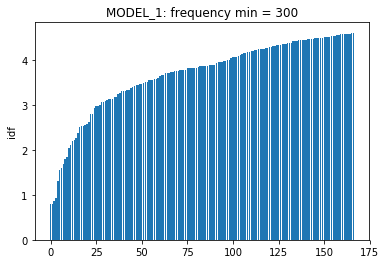

In [36]:
import numpy as np
y, x = zip(*features_min_300)
x_pos = np.arange(len(x))
plt.bar(x_pos, y, align='center')
#plt.xticks(x_pos, x, rotation = 90)
plt.ylabel('idf')
plt.title('MODEL_1: frequency min = 300')

plt.show()

In [37]:
# FEATURE SET2 for min frequency 17 

features_min_17 = compute_idf(recipes_train,17,14000)

In [38]:
# FEATURE SET3 for min frequency 17 and max frequency 500

features_min_17_max_500 = compute_idf(recipes_train,17,500)

In [39]:
# FEATURE SET4 for min frequency 4

features_min_4 = compute_idf(recipes_train,4, 14000)

In [40]:
len(features_min_300), len(features_min_17),len (features_min_17_max_500), len(features_min_4)

(167, 1387, 1283, 2764)

In [41]:
def create_X_train(features):
    X_train = np.ndarray((len(recipes_train),len(features))) # numpy array n
    for i in range(len(recipes_train)):
        recipe = recipes_train_2_dict[i]
        for j in range(len(features)):
            feature = features[j][1]
            idf_feature = features[j][0]
            tf = recipe.get(feature, 0)  #give me a count of an ingredient, but if you don't find it give me 0
            feature_value = tf * idf_feature
            X_train[i,j] = feature_value
    return X_train

In [42]:
def create_X_test(features):
    X_test = np.ndarray((len(recipes_test),len(features))) # numpy array n
    for i in range(len(recipes_test)):
        recipe_test = recipes_test_2_dict[i]
        for j in range(len(features)):
            feature = features[j][1]
            idf_feature = features[j][0]
            df = recipe_test.get(feature, 0)   #give me a count of an ingredient, but if you don't find it give me 0
            feature_value = df * idf_feature
            X_test[i,j] = feature_value
    return X_test

In [43]:
# convert y into labels (0-19)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y_labels = le.fit(cook.cuisine)
y_labels = le.transform(cook.cuisine)
cook['labels'] = pd.DataFrame(y_labels)

In [44]:
y_train = cook['labels'][:30000].values
y_test = cook['labels'][30000:].values

In [45]:
X_train_min_300 = create_X_train(features_min_300)
X_test_min_300 = create_X_test(features_min_300)

In [46]:
X_train_min_4 = create_X_train(features_min_4)
X_test_min_4 = create_X_test(features_min_4)


In [47]:
X_train_min_17 = create_X_train(features_min_17)
X_test_min_17 = create_X_test(features_min_17)

In [48]:
X_train_min_17_max_500 = create_X_train(features_min_17_max_500)
X_test_min_17_max_500 = create_X_test(features_min_17_max_500)

## MODEL2: "bag of words"

- Model_2 ’bag of words’ relays on the sklearn.feature_extraction.text.TfidfVectorizer analyzer. 
The main difference between those two models is that the python code in Model_1 calculates tf-idf based on strings 
or ingredients that usually consist of two words or even more 
while TfidfVectorizer considers single items within a string. 

- Practically Tfidf Vectorizer divides each ingredient by space and considers each word that the ingredient consists of.

In [49]:
recipes_CV_train = [','.join(recipe) for recipe in recipes_train] # each recipe is a string
recipes_CV_test = [','.join(recipe) for recipe in recipes_test] # each recipe is a string

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

def create_X(min, max):
    cv = TfidfVectorizer(sublinear_tf = True, min_df = min, max_df = max, stop_words='english', \
                         norm='l2', binary = True, use_idf = True)
    X_train = cv.fit_transform(recipes_CV_train)
    X_test = cv.transform(recipes_CV_test)
    return X_train, X_test

In [51]:
X_train_min_300_Tf, X_test_min_300_Tf  = create_X(300, 0.8)

In [52]:
X_train_min_4_Tf, X_test_min_4_Tf = create_X(4, 0.8)

In [53]:
X_train_min_17_Tf, X_test_min_17_Tf = create_X(17,14000)

In [54]:
X_train_min_17_max_500_Tf, X_test_min_17_max_500_Tf = create_X(17,500)

In [55]:
print (X_train_min_300_Tf.shape, X_train_min_4_Tf.shape, X_train_min_17_Tf.shape,\
       X_train_min_17_max_500_Tf.shape)

(30000, 240) (30000, 1821) (30000, 1111) (30000, 950)


In [56]:
print (X_test_min_300_Tf.shape, X_test_min_4_Tf.shape, X_test_min_17_Tf.shape,\
       X_test_min_17_max_500_Tf.shape)

(9774, 240) (9774, 1821) (9774, 1111) (9774, 950)


## CLASSIFICATION

###  MODEL1 and MODEL 2:  LOGISTIC REGRESSION

In [57]:
def logistic_fit_score(X_train, y_train,X_test, y_test):
    logistic = LogisticRegression(multi_class='auto', solver = "lbfgs", max_iter = 500)
    logistic.fit(X_train, y_train)
    y_pred = logistic.predict(X_test)
    return f1_score(y_test, y_pred, average = "weighted"), accuracy_score(y_test,y_pred)

### MODEL1 ACCURACY anf F1 score for 4 different data sets

In [58]:
log_f1_min_300, log_acc_min_300 = logistic_fit_score(X_train_min_300,y_train, X_test_min_300, y_test)

In [59]:
log_f1_min_300, log_acc_min_300

(0.615164395266105, 0.62993656640065476)

In [60]:
log_f1_min_4, log_acc_min_4 = logistic_fit_score(X_train_min_4,y_train, X_test_min_4, y_test)

In [61]:
log_f1_min_4, log_acc_min_4

(0.73576481591508625, 0.73695518723143028)

In [62]:
log_f1_min_17, log_acc_min_17 = logistic_fit_score(X_train_min_17, y_train, X_test_min_17, y_test)

In [63]:
log_f1_min_17, log_acc_min_17

(0.73042090930613368, 0.73204419889502759)

In [64]:
log_f1_min17_max500, log_acc_min17_max500 = logistic_fit_score(X_train_min_17_max_500,y_train, X_test_min_17_max_500, y_test)

In [65]:
log_f1_min17_max500, log_acc_min17_max500

(0.65956399199558324, 0.66584816861059959)

### MODEL2 ACCURACY and F1 score for  4 different data sets

In [66]:
log_f1_min_300_Tf, log_acc_min_300_Tf = logistic_fit_score(X_train_min_300_Tf,y_train, X_test_min_300_Tf, y_test)

In [67]:
log_f1_min_300_Tf, log_acc_min_300_Tf

(0.70517723193705595, 0.71413955391855943)

In [68]:
log_f1_min_4_Tf, log_acc_min_4_Tf = logistic_fit_score(X_train_min_4_Tf,y_train, X_test_min_4_Tf, y_test)

In [69]:
log_f1_min_4_Tf, log_acc_min_4_Tf

(0.77721065722344651, 0.78381420094127274)

In [70]:
log_f1_min_17_tf, log_acc_min_17_tf = logistic_fit_score(X_train_min_17_Tf,y_train, X_test_min_17_Tf, y_test)

In [71]:
log_f1_min_17_tf, log_acc_min_17_tf

(0.7730942027577602, 0.77982402291794561)

In [72]:
log_f1_min17_max500_tf, log_acc_min17_max500_tf = logistic_fit_score(X_train_min_17_max_500_Tf,y_train, X_test_min_17_max_500_Tf, y_test)

In [73]:
log_f1_min17_max500_tf, log_acc_min17_max500_tf

(0.627165154072725, 0.64016779210149377)

In [74]:

models = ['Model1','Model2']

test_acc_m1 = [log_acc_min_300,log_acc_min_4,log_acc_min_17,log_acc_min17_max500]
test_acc_m2 = [log_acc_min_300_Tf,log_acc_min_4_Tf,log_acc_min_17_tf,log_acc_min17_max500_tf]
options = ['minFrq_300', 'minFreq_4', 'minFreq_17', 'minFreq_17_max_500']
features_no_m1 = [len(features_min_300),len(features_min_4), len(features_min_17), len (features_min_17_max_500)]
features_no_m2 = [X_train_min_300_Tf.shape[1],X_train_min_4_Tf.shape[1], X_train_min_17_Tf.shape[1],\
                  X_train_min_17_max_500_Tf.shape[1]]
data_model1= pd.DataFrame({'accuracy': test_acc_m1, "options" : options, "model": [models[0]]*4, "no_features": features_no_m1})
data_model2= pd.DataFrame({'accuracy': test_acc_m2, "options" : options, "model": [models[1]]*4, "no_features": features_no_m2})

data_all = pd.concat([data_model1, data_model2], axis = 0)

In [75]:
data_all

,accuracy,options,model,no_features
0,0.629937,minFrq_300,Model1,167
1,0.736955,minFreq_4,Model1,2764
2,0.732044,minFreq_17,Model1,1387
3,0.665848,minFreq_17_max_500,Model1,1283
0,0.714140,minFrq_300,Model2,240
1,0.783814,minFreq_4,Model2,1821
2,0.779824,minFreq_17,Model2,1111
3,0.640168,minFreq_17_max_500,Model2,950


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


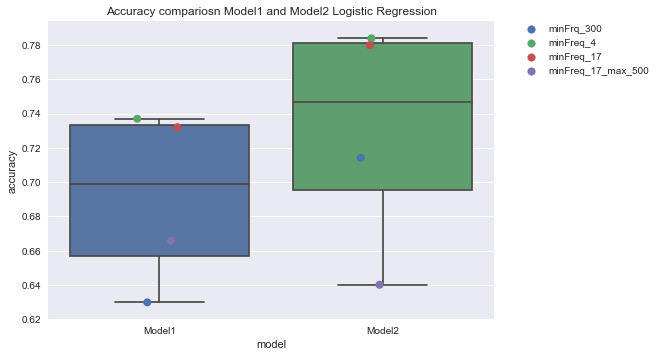

In [76]:
import seaborn as sns
sns.boxplot(x='model', y='accuracy', data=data_all)
ax = sns.stripplot(x='model', y='accuracy', data=data_all, 
              size=8, jitter=True, hue = 'options', edgecolor="gray", linewidth=0.01)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Accuracy compariosn Model1 and Model2 Logistic Regression')
plt.show()

### Conclusion (Logistic Regression):
    
In the both models, Model l and Model 2, the highest accuracy score is achieved when the minimum frequency was set to 4 (0.737 and 0.783 respectively), altough this data set requires the highest number of features. The data set with minimum frequency set to 17 achieves very high accuracy in the both models that is very similar to accuracy in the data set with minimum grequency set to 4. The only difference is that  the number of features with minimum frequency set to 17 is significantly lower if we compare with number of features in the data set with minimum frequency set to 4.

When considering both, the accuracy and the number of features, we can notice that the data set with the minimum frequency set to 300, in Model2 with Tfidf Vectorizer, demonstrates the best results since it can achieve the accuracy score of 0.71 with only 240 features.

The highest number of features is generated with the option when the minimum frequency is set to 4. This is a logical result since 50% of all features  have a frequency of 4 and below. Model_1 which captures the entire ingredient, generated more features than Model_2, which works with single words.


Model_2 captures repeating words among different ingredients only one time while Model_1 considers each ingredient separately even in cases when there are some repeating words within: ‘red onion’, ‘red lentils’. 

When the number of features is not overly high, e.g. option min. frequency = 300, Model_2 has to learn more words so instead of considering only 2 ingredients ‘red onion’ and ‘red lentils’ it has to learn 3 words ‘red’, ‘onion’ and ‘lentils’. When the number of features become high (e.g. option min. frequency = 4), Model1 has to leran all rare and unique ingrediants that Model2 does not have to.

### MODEL1 and MODEL 2: SUPPORT VECTOR MACHINE

### DATA SCALING

In [101]:
from sklearn.preprocessing import MinMaxScaler 

def dataScaling(X_train, X_test):
    scaler = MinMaxScaler() 
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train) 
    X_test_s = scaler.transform(X_test) 
    return X_train_s, X_test_s

In [102]:
X_train_min_300_s, X_test_min_300_s = dataScaling(X_train_min_300, X_test_min_300)

In [103]:
X_train_min_4_s, X_test_min_4_s = dataScaling(X_train_min_4, X_test_min_4)

In [110]:
X_train_min_17_s, X_test_min_17_s = dataScaling(X_train_min_17, X_test_min_17)

In [114]:
X_train_min17_max500_s, X_test_min17_max500_s = dataScaling(X_train_min_17_max_500, X_test_min_17_max_500)

In [121]:
from sklearn.preprocessing import MaxAbsScaler
def dataScaling_sparse(X_train, X_test):
    scaler = MaxAbsScaler() 
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train) 
    X_test_s = scaler.transform(X_test) 
    return X_train_s, X_test_s

In [122]:
X_train_min_300_Tf_s, X_test_min_300_Tf_s = dataScaling_sparse(X_train_min_300_Tf, X_test_min_300_Tf)

In [123]:
X_train_min_4_Tf_s, X_test_min_4_Tf_s = dataScaling_sparse(X_train_min_4_Tf, X_test_min_4_Tf)

In [134]:
X_train_min_17_tf_s, X_test_min_17_tf_s = dataScaling_sparse(X_train_min_17_Tf, X_test_min_17_Tf)

In [125]:
X_train_min17_max500_tf_s, X_test_min17_max500_tf_s = dataScaling_sparse(X_train_min_17_max_500_Tf, X_test_min_17_max_500_Tf)

In [105]:
def SVC_fit_score(X_train,y_train,X_test,y_test):
    model = LinearSVC(max_iter = 10000)
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    return f1_score(y_test, y_pred, average = "weighted"), accuracy_score(y_test,y_pred)

### MODEL1 ACCURACY and F1 score for 4 different data sets

In [106]:
svc_f1_min_300, svc_acc_min_300 = SVC_fit_score(X_train_min_300_s,y_train, X_test_min_300_s, y_test)

In [107]:
svc_f1_min_300, svc_acc_min_300

(0.59583723205617556, 0.62195621035400039)

In [108]:
svc_f1_min_4, svc_acc_min_4 = SVC_fit_score(X_train_min_4_s,y_train, X_test_min_4_s, y_test)

In [109]:
svc_f1_min_4, svc_acc_min_4

(0.76587672120158767, 0.76969510947411501)

In [111]:
svc_f1_min_17, svc_acc_min_17 = SVC_fit_score(X_train_min_17_s,y_train, X_test_min_17_s, y_test)

In [112]:
svc_f1_min_17, svc_acc_min_17

(0.75652390906611355, 0.76151012891344383)

In [115]:
svc_f1_min17_max500, svc_acc_min17_max500 = SVC_fit_score(X_train_min17_max500_s, y_train, X_test_min17_max500_s, y_test)

In [116]:
svc_f1_min17_max500, svc_acc_min17_max500

(0.66999921716338628, 0.67853488847963983)

### MODEL2 ACCURACY and F1 score for 4 different data sets

In [129]:
svc_f1_min_300_Tf, svc_acc_min_300_Tf = SVC_fit_score(X_train_min_300_Tf_s,y_train, X_test_min_300_Tf_s, y_test)

In [130]:
svc_f1_min_300_Tf, svc_acc_min_300_Tf

(0.6932741258289058, 0.70554532432985473)

In [131]:
svc_f1_min_4_Tf, svc_acc_min_4_Tf = SVC_fit_score(X_train_min_4_Tf_s,y_train, X_test_min_4_Tf_s, y_test)

In [132]:
svc_f1_min_4_Tf, svc_acc_min_4_Tf

(0.78099310159976276, 0.78555350931041534)

In [135]:
svc_f1_min_17_Tf, svc_acc_min_17_Tf = SVC_fit_score(X_train_min_17_tf_s,y_train, X_test_min_17_tf_s, y_test)

In [136]:
svc_f1_min_17_Tf, svc_acc_min_17_Tf

(0.775460772405556, 0.78054020871700425)

In [139]:
svc_f1_min17_max500_tf, svc_acc_min17_max500_tf = logistic_fit_score(X_train_min17_max500_tf_s,y_train, X_test_min17_max500_tf_s, y_test)

In [140]:
svc_f1_min17_max500_tf, svc_acc_min17_max500_tf

(0.62625772306009697, 0.64047472887251888)

In [142]:
models = ['Model1','Model2']

test_acc_m1 = [svc_acc_min_300,svc_acc_min_4,svc_acc_min_17,svc_acc_min17_max500]
test_acc_m2 = [svc_acc_min_300_Tf,svc_acc_min_4_Tf,svc_acc_min_17_Tf,svc_acc_min17_max500_tf]
options = ['minFrq_300', 'minFreq_4', 'minFreq_17', 'minFreq_17_max_500']
features_no_m1 = [len(features_min_300),len(features_min_4), len(features_min_17), len (features_min_17_max_500)]
features_no_m2 = [X_train_min_300_Tf.shape[1],X_train_min_4_Tf.shape[1], X_train_min_17_Tf.shape[1],\
                  X_train_min_17_max_500_Tf.shape[1]]
data_model1= pd.DataFrame({'accuracy': test_acc_m1, "options" : options, "model": [models[0]]*4, "no_features": features_no_m1})
data_model2= pd.DataFrame({'accuracy': test_acc_m2, "options" : options, "model": [models[1]]*4, "no_features": features_no_m2})

data_all = pd.concat([data_model1, data_model2], axis = 0)

In [143]:
data_all

,accuracy,options,model,no_features
0,0.621956,minFrq_300,Model1,167
1,0.769695,minFreq_4,Model1,2764
2,0.761510,minFreq_17,Model1,1387
3,0.678535,minFreq_17_max_500,Model1,1283
0,0.705545,minFrq_300,Model2,240
1,0.785554,minFreq_4,Model2,1821
2,0.780540,minFreq_17,Model2,1111
3,0.640475,minFreq_17_max_500,Model2,950


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


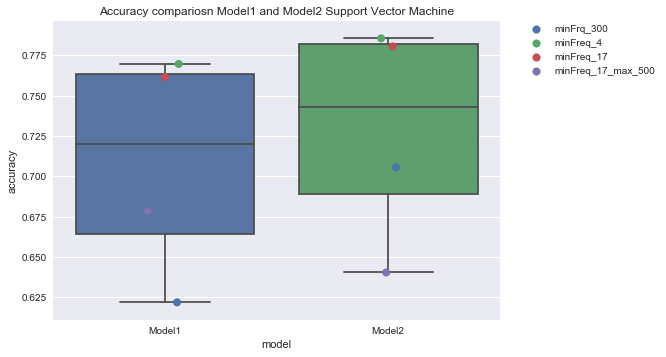

In [144]:
import seaborn as sns
sns.boxplot(x='model', y='accuracy', data=data_all)
ax = sns.stripplot(x='model', y='accuracy', data=data_all, 
              size=8, jitter=True, hue = 'options', edgecolor="gray", linewidth=0.01)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Accuracy compariosn Model1 and Model2 Support Vector Machine')
plt.show()


### Conclusion (Support Vector Machine):

Support Vector Machine produces similar results as Logistc Regression

### CONFUSION MATRIX


### MODEL2 min frequency 300

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


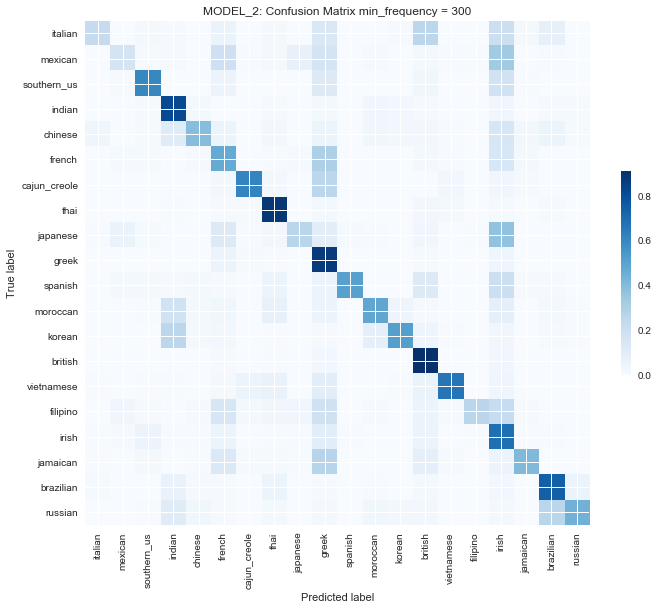

In [164]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))
cmap=plt.cm.Blues

model = LogisticRegression(random_state=0)
#model = LinearSVC()

model.fit(X_train_min_300_Tf, y_train)
y_pred = model.predict(X_test_min_300_Tf)


cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#fig, ax = plt.subplots()
#im = ax.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
#ax.figure.colorbar(im, ax=ax)

plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = cook_test['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.title('MODEL_2: Confusion Matrix min_frequency = 300')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [165]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.52      0.22      0.31       122
     mexican       0.42      0.16      0.23       204
 southern_us       0.71      0.60      0.65       399
      indian       0.74      0.82      0.78       683
     chinese       0.60      0.39      0.48       183
      french       0.49      0.47      0.48       677
cajun_creole       0.81      0.61      0.70       303
        thai       0.84      0.88      0.86       743
    japanese       0.57      0.26      0.36       171
       greek       0.70      0.87      0.78      1886
     spanish       0.84      0.51      0.63       122
    moroccan       0.72      0.49      0.58       339
      korean       0.70      0.51      0.59       204
     british       0.85      0.91      0.88      1575
  vietnamese       0.81      0.66      0.73       207
    filipino       0.68      0.26      0.37       105
       irish       0.53      0.69      0.60      1035
    jamaican       0.69    

### MODEL2 min frequency 17

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


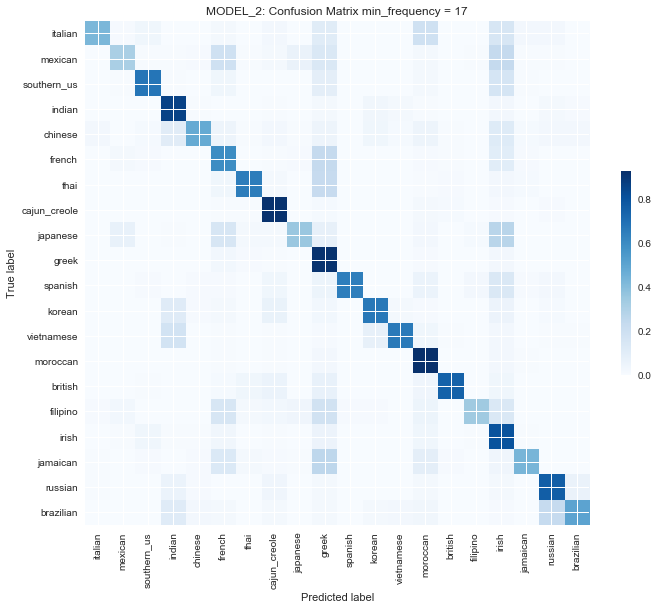

In [159]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))
cmap=plt.cm.Blues

model = LogisticRegression(random_state=0)
#model = LinearSVC()

model.fit(X_train_min_17_Tf, y_train)
y_pred = model.predict(X_test_min_17_Tf)


cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#fig, ax = plt.subplots()
#im = ax.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
#ax.figure.colorbar(im, ax=ax)

plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = cook_test['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.title('MODEL_2: Confusion Matrix min_frequency = 17')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [160]:
# print Classifcation Report for min frequency = 17

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.81      0.43      0.56       122
     mexican       0.62      0.31      0.42       204
 southern_us       0.81      0.68      0.74       399
      indian       0.79      0.86      0.83       683
     chinese       0.74      0.48      0.58       183
      french       0.61      0.60      0.60       677
        thai       0.82      0.65      0.73       303
cajun_creole       0.86      0.92      0.89       743
    japanese       0.68      0.36      0.47       171
       greek       0.76      0.92      0.83      1886
     spanish       0.93      0.65      0.76       122
      korean       0.82      0.67      0.74       339
  vietnamese       0.82      0.66      0.73       204
    moroccan       0.89      0.93      0.91      1575
     british       0.87      0.75      0.80       207
    filipino       0.69      0.34      0.46       105
       irish       0.65      0.80      0.72      1035
    jamaican       0.74    

## Conclusion:
The two normalized confusion matricies for the data set with the minimum frequency = 300 for Model_2 done with 
logistic regression and for the data set with minimum frequency = 17 for Model_2 run with logistic regression. 
The f1-score for Cajun_creole, Irish, Greek and Moroccan cuisines are high in both data sets. We can see that 
many other cuisines are predicted as Greek, Irish cuisine or French cuisine
Italian cuisne that has the highest number of recipies in the data set is often predicted inappropriately as 
Greek, Moroccan and Irish cuisine.In general the f1 score for majority of cuisines is significant.


## TSNE and TruncatedSVD

In [167]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
from sklearn.manifold import TSNE

def create_X_tsne(X_train):
    from sklearn.random_projection import sparse_random_matrix
    svd = TruncatedSVD(n_components=200, n_iter=7, random_state=42)
    X_svd = svd.fit_transform(X_train)
    print(svd.explained_variance_ratio_.sum())
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    X_tsne = tsne.fit_transform(X_svd)
    return X_tsne

In [168]:
# Matrix Model_2 min frequency = 4
# apply Trunctated SVD to reduce dim from 1821 to 200
# then apply tsne

X_tsne_min_4_M2 = create_X_tsne(X_train_min_4_Tf)

0.603060179831
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.390s...
[t-SNE] Computed neighbors for 30000 samples in 417.639s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional pro

In [169]:
legend_colors = {u'brazilian':"#000000", # blak
                u'british':"#FFFF00", # yellow
                u'cajun_creole':"#1CE6FF", #cyan
                u'chinese': "#FF34FF", #pink 
                u'filipino':"#FF4A46", #red
                u'french':"#FFC300",  # green forest
                u'greek':"#006FA6", # blue oc
                u'indian': "#7A4900",  # gold or brown 
                u'irish':"#0000A6", # blue electric 
                u'italian':"#63FFAC", # green phospho
                u'jamaican': "#B79762", #brown
                u'japanese': "#EEC3FF", #  
                u'korean':"#8FB0FF", # light blue 
                u'mexican':"#997D87", #violet
                u'moroccan':"#5A0007", 
                u'russian':"#809693", 
                u'southern_us':"#FEFFE6", #ligt yellow
                u'spanish':"#1B4400",
                u'thai':"#A30059",# purple
                u'vietnamese':"#FFDBE5"}  #light pink}

In [170]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

legend = []
for l, c in legend_colors.items():
    legend.append(mpatches.Patch(color=c, label=l))

In [171]:
colormap = []
for cuisine in cook_train['cuisine']:
    colormap.append(legend_colors[cuisine])

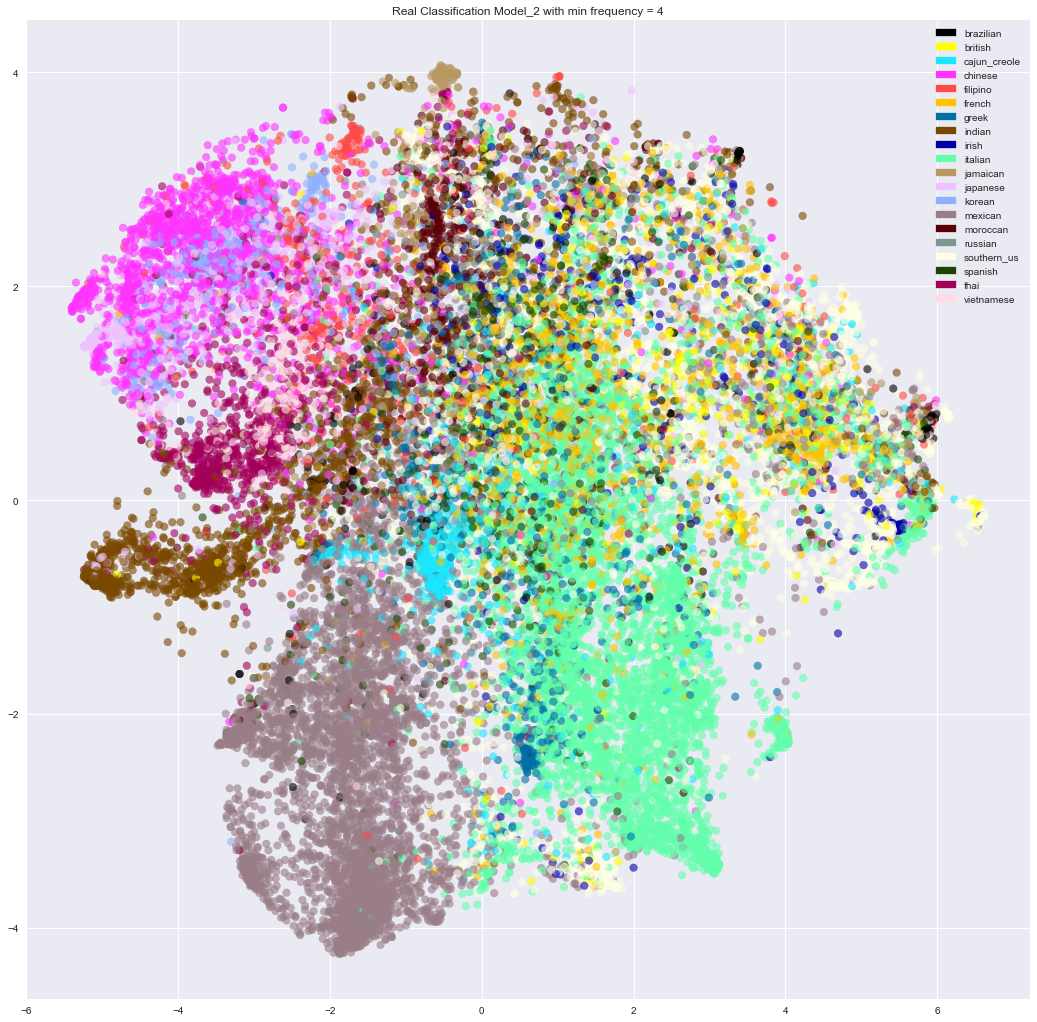

In [172]:
fig, ax = plt.subplots(figsize=(18,18))
plt.scatter(X_tsne_min_4_M2[:,0], X_tsne_min_4_M2[:,1], c=colormap, alpha=.6, s=60)
plt.title('Real Classification Model_2 with min frequency = 4')
plt.legend(handles=legend)

From those plots we can clearly see how some of the cuisines are nicely spaced apart.
Chinese cuisine (pink color), Korean (light blue), Thai (purple color) and Filipino (red) are close to each other. 
This is logical since they belong to the group of Asian cuisines and probably have similar or common ingredients 
in their recipes. Even Japanese and Vietnamese (light pink) cuisines, which are not clearly differentiated. 
Italian cuisine (green color) is well grouped but also overlaps with other cuisines e.g. French (orange), 
Greek (blue ocean), British (yellow), Irish (dark blue) and Southern_US (light yellow/white color). 
Jamaican (brown color) and Mexican (gray) are also nicely spaced apart. French and Irish cuisines are spaced out. 

## K-MEANS

In [173]:
# matrix Model_1 min frequency = 4

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_train_min_4)
km_labels = kmeans.labels_

In [174]:
df_KM = pd.DataFrame(X_train_min_4)
df_KM['km_labels'] = km_labels
df_KM = df_KM.groupby('km_labels').sum().T

In [175]:
top_20 = df_KM[0].nlargest(20).index.tolist()

In [176]:
for cluster in df_KM:
    top_30 = df_KM[cluster].nlargest(30).index.tolist()
    print("Cluster %d:" % cluster)
    print(", ".join([features_min_4[i][1] for i in top_30]))
    print()

Cluster 0:
cilantro, cumin, chili powder, avocado, jalapeno chilies, sour cream, salsa, corn tortillas, lime juice, black beans, tomatoes, onion, flour tortillas, lime, shredded cheddar cheese, chicken breasts, bell pepper, garlic, salt, olive oil, garlic powder, chicken broth, shredded monterey jack cheese, dried oregano, beef, enchilada sauce, vegetable oil, tortilla chips, refried beans, kosher salt

Cluster 1:
white sesame seeds, sweet chili sauce, sweet soy sauce, roasted cashews, butter lettuce, chicken, cilantro leaves, fish sauce, oil, lime juice, wonton wrappers, white bell pepper, shrimp, corn starch, sesame oil, scallions, garlic, onion, water, salt, bell pepper, olive oil, sugar, butter, flour, eggs, tomatoes, parsley, cilantro, vegetable oil

Cluster 2:
garam masala, turmeric, coriander, ginger, cumin seed, tumeric, cumin, green chilies, oil, tomatoes, chili powder, onion, clove, cinnamon, curry leaves, cilantro leaves, salt, garlic paste, coriander powder, mustard seeds, 

## Conclusion
The result shows indexing of each cluster to identify which of the top 30 words are nearest to the cluster centroid. 
The top 30 words provide the opportunity to also capture rare and specific ingredients.  
Many of the common ingredients were repeating among the clusters. 
I excluded the most common ingredients for each cluster and kept only the specific ones that generated a meaningful 
explanation.  Cluster 2 ingredients reminded me of Indian cuisine while Cluster 0 of Mexican cuisine. 
Cluster 4 contains mostly milk and egg based products .